In [42]:
# Importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [43]:
# Importing the database
df=pd.read_csv ('C:\Users\tanis\Documents\HeartDiseasePredicion\Heart Disease data.csv')
df.columns
df.rows
df.head()
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [44]:
df.dtypes
df=df.astype({"cp":'float',"trestbps":'float',"chol":'float',"fbs":'float',
              "restecg":'float',"thalach":'float',"exang":'float',
              "oldpeak":'float',"slope":'float',"ca":'float',"thal":'float'}) 
df.dtypes

age           int64
sex           int64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [45]:
# Making a new dataset for plotting a bar plot for sex vs heart disease
hd=[1]
nd=df[df.target.isin(hd)]
nd=nd.drop(['age','cp','trestbps','chol','fbs','restecg','thalach',
       'exang','oldpeak','slope','ca','thal'],axis=1)
print(nd)

     sex  target
0      1       1
1      1       1
2      0       1
3      1       1
4      0       1
..   ...     ...
160    1       1
161    0       1
162    1       1
163    1       1
164    1       1

[165 rows x 2 columns]


In [46]:
# Get the number count of heart disease patient in each sex category
nd['sex'].value_counts()

1    93
0    72
Name: sex, dtype: int64

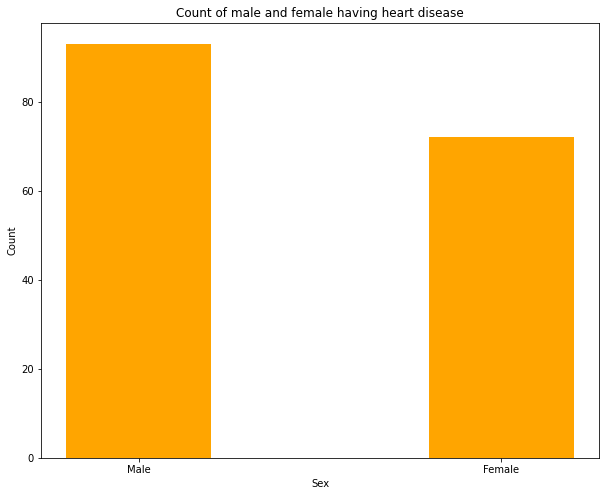

In [47]:
# Plotting the graph
data = {'Male':93, 'Female':72} 
courses = list(data.keys()) 
values = list(data.values()) 

fig = plt.figure(figsize = (10, 8)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='orange',  
        width = 0.4) 
  
plt.xlabel("Sex") 
plt.ylabel("Count") 
plt.title("Count of male and female having heart disease") 
plt.show() 

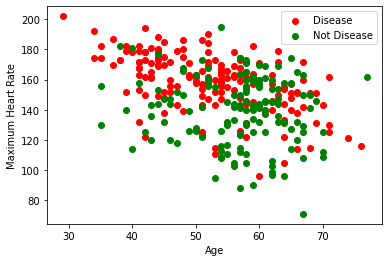

In [48]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c = 'green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Training and testing the data set

In [49]:
# Splitting the data set
df.columns

feature_df=df[['age','sex','cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
x=np.asarray(feature_df)
y=np.asarray(df['target'])

In [50]:
# Training the data set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

# 242 x 11
x_train.shape

# 242 x 1
y_train.shape

# 61 x 11
x_test.shape

# 61 x 1
y_test.shape

(61,)

# Support vector machines (SVM)

In [51]:
# Initialising svm and appling it to the test values of the dataset
classifier=svm.SVC(kernel='linear',gamma='auto',C=1)
classifier.fit(x_test,y_test)
y_predict_svm=classifier.predict(x_test)

# Printing the accuracy
print(cr(y_test,y_predict_svm))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



Text(33.0, 0.5, 'True')

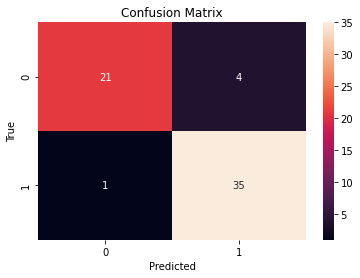

In [52]:
# Confusion Matrix
matrix = cm(y_test, y_predict_svm)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


In [53]:
#Actual value and the predicted value
svm_predic_values = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predict_svm})
print(svm_predic_values)

    Actual value  Predicted value
0              1                1
1              0                0
2              1                1
3              1                1
4              0                1
..           ...              ...
56             1                1
57             1                1
58             0                0
59             0                0
60             1                1

[61 rows x 2 columns]


In [54]:
feature_df=df[['age','thalach']]
Xsvm=np.asarray(feature_df)
ysvm=np.asarray(df['target'])
Xsvm_train,Xsvm_test,ysvm_train,ysvm_test=train_test_split(Xsvm,ysvm,test_size=0.2,random_state=4)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xsvm_train = sc.fit_transform(Xsvm_train)
Xsvm_test = sc.transform(Xsvm_test)
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(Xsvm_train, ysvm_train)

SVC(random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


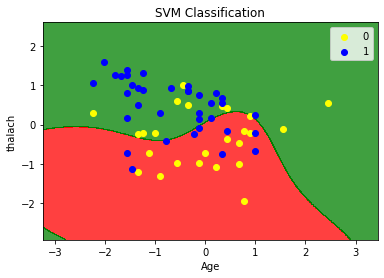

In [55]:
from matplotlib.colors import ListedColormap
X_set, y_set = Xsvm_test, ysvm_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('SVM Classification')
plt.xlabel('Age')
plt.ylabel('thalach')
plt.legend()
plt.show()

# K – nearest neighbor classifier (K-NN)

Text(0, 0.5, 'Error Rate')

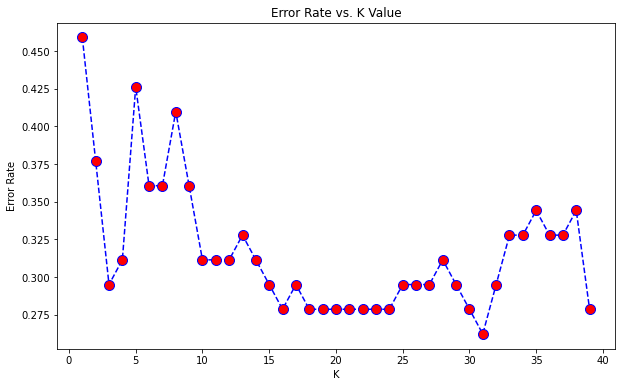

In [56]:
# Finding the best Value for n neighbour
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [57]:
#Standardising the values
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
# Applying the knn algorithm with the most accurate value of n neighbout
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train,y_train)

# Predict the values using knn algorithm
y_predict_knn=knn.predict(x_test)

# Displaying the accuracy
print(cr(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.83      0.97      0.90        36

    accuracy                           0.87        61
   macro avg       0.89      0.85      0.86        61
weighted avg       0.88      0.87      0.86        61



Text(33.0, 0.5, 'True')

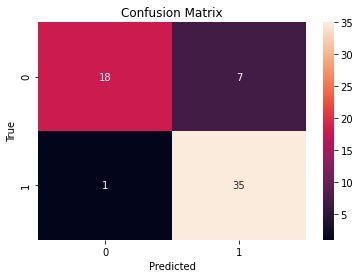

In [58]:
# Confusion Matrix
matrix = cm(y_test, y_predict_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [59]:
#Actual value and the predicted value
knn_predic_values = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predict_knn})
print(knn_predic_values)

    Actual value  Predicted value
0              1                1
1              0                0
2              1                1
3              1                1
4              0                1
..           ...              ...
56             1                1
57             1                1
58             0                0
59             0                0
60             1                1

[61 rows x 2 columns]


In [60]:
feature_df=df[['age','thalach']]
Xknn=np.asarray(feature_df)
yknn=np.asarray(df['target'])
Xknn_train,Xknn_test,yknn_train,yknn_test=train_test_split(Xknn,yknn,test_size=0.2,random_state=4)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xknn_train)
Xknn_train=scaler.transform(Xknn_train)
Xknn_test=scaler.transform(Xknn_test)
knn1 = KNeighborsClassifier(n_neighbors=31)
knn1.fit(Xknn_train,y_train)

KNeighborsClassifier(n_neighbors=31)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


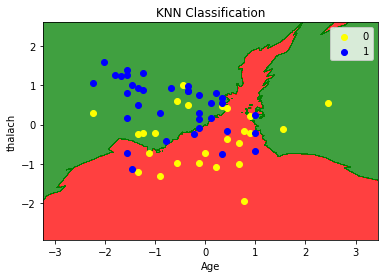

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = Xknn_test, yknn_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('KNN Classification')
plt.xlabel('Age')
plt.ylabel('thalach')
plt.legend()
plt.show()